# Remittance Patterns and Economic Development

Remittance is the money transferred by migrants to their families and friends back home. It is an important source of income for many developing countries, with the World Bank estimating that remittances to developing countries reached $553 billion in 2019. Remittance inflows have been increasing steadily over the years, and they are expected to continue growing in the future. This has led to increased attention from policymakers and researchers on the impact of remittance on the economic development of recipient countries.

<a id='Introduction'></a>
# Description of dataset

This notebook shows the exploratory data analysis of datasets regarding worldwide economic remittances. The data used for this analysis is from [the Global Knowledge Partnership on Migration and Development (KNOMAD)](https://www.knomad.org/data/remittances) website in their broader effort to fill the knowledge gaps for monitoring and analyzing migration and remittances. It provides remittance data movements (inbound and outbound) between various countries. 

The code for cleaning the remittance inflows and outflows data can be found on the following Github links:

- [Remittance inflows](https://github.com/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Data_Cleaning_Remittance_Inflows.ipynb)
- [Remittance outflows](https://github.com/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Data_Cleaning_Remittance_Outflows.ipynb)

After data cleaning, data covers 171 countries and spans from 1990 to 2022. All values are in terms of millions of US dollars. The code performs various cleaning tasks on the data, such as removing duplicates, handling missing values, and converting data types. You can view the code on Github to see the specific steps taken to clean the data.

    * `remittance_inflows.csv`: Historical remittance money inflow into world countries since 1990. 
    * `remittance_outflows.csv`: Historical remittance money outflow from world countries since 1990. 

In order get the Sub-region for each country, we included the `country-to-continent` dataset from [Kaggle](https://www.kaggle.com/datasets/statchaitya/country-to-continent/download?datasetVersionNumber=1). 

Overall, this dataset provides a wealth of information on the movement of remittance money between countries over the past few decades. The dataset can be used for a variety of analysis, such as 

- understanding the trends in remittance inflows and outflows, 
- identifying the countries with the largest remittance flows, and 
- exploring the relationships between remittance flows and other economic indicators.

### Import the neceesary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load datasets
inflow_data = pd.read_csv('/content/remittance_inflows.csv', encoding = "ISO-8859-1")
outflow_data = pd.read_csv('/content/remittance_outflows.csv', encoding = "ISO-8859-1")

In [ ]:
inflow = inflow_data.copy()
outflow = outflow_data.copy()

In [ ]:
print('Inflow shape:', inflow.shape, 'Outflow shape:', outflow.shape)
# Snippet of 'inflow' Dataframe
inflow.head()

Inflow shape: (171, 35) Outflow shape: (99, 34)


,Migrant remittance inflows (US$ million),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,%GDP_2022
0,Afghanistan,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,300.000000,350.000000,2.058824
1,Albania,0.00000,0.000000,151.8,332.000000,307.100000,427.3,550.900000,300.300000,504.140000,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1718.320554,1800.000000,9.859772
2,Algeria,352.44176,232.990263,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1829.459057,0.977510
3,Angola,0.00000,0.000000,0.0,0.000000,0.000000,0.0,5.142000,0.000000,0.000000,...,30.971119,11.114712,3.988048,1.418196,1.579247,3.445473,8.053051,12.631149,16.420494,0.013158
4,Antigua and Barbuda,9.40000,0.000000,0.0,7.925926,8.614815,0.0,8.940741,9.537037,18.755556,...,32.100000,31.244412,26.705676,24.020044,32.768265,36.955426,36.331448,50.142028,34.590023,2.044328


## Exploratory Data Analysis

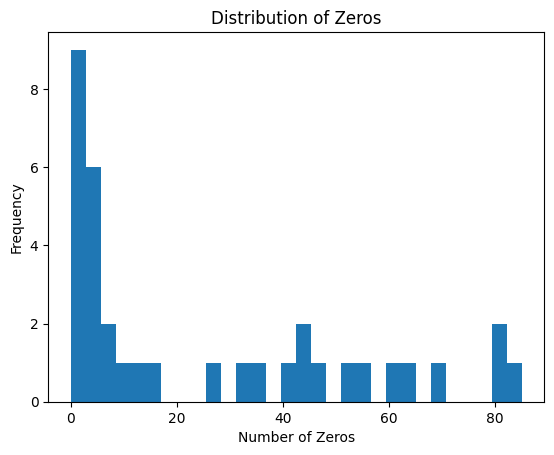

In [ ]:
# Count the number of zeros in each column
zeros_count = (inflow == 0).astype(int).sum(axis=0)

# Plot the distribution of zeros
plt.hist(zeros_count, bins=30)
plt.title('Distribution of Zeros')
plt.xlabel('Number of Zeros')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Print the percentage of zeros in each column
zeros_percent = (inflow == 0).mean(axis=0) * 100
print(zeros_percent)

Migrant remittance inflows (US$ million)     0.000000
1990                                        47.953216
1991                                        49.707602
1992                                        46.783626
1993                                        40.935673
1994                                        36.842105
1995                                        35.087719
1996                                        31.578947
1997                                        30.409357
1998                                        28.070175
1999                                        26.315789
2000                                        25.730994
2001                                        23.391813
2002                                        19.883041
2003                                        18.713450
2004                                        16.374269
2005                                         8.771930
2006                                         7.602339
2007                        

In [ ]:
# Summary Statistics
inflow.describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
1990,171.000000,330.771219,909.880607,0.000000,0.000000,0.487599,90.351817,5025.494576
1991,171.000000,338.415741,902.012902,0.000000,0.000000,0.077778,102.612461,4808.500000
1992,171.000000,381.109274,1005.609170,0.000000,0.000000,0.870370,120.125322,6104.000000
1993,171.000000,384.208500,965.179697,0.000000,0.000000,9.618519,152.201094,5664.000000
1994,171.000000,413.050914,968.817091,0.000000,0.000000,11.401200,191.062732,5856.694458
1995,171.000000,477.173096,1093.394875,0.000000,0.000000,15.021584,308.100000,6222.996282
1996,171.000000,502.095190,1176.147930,0.000000,0.000000,19.318019,302.726101,8765.693607
1997,171.000000,596.126855,1491.755043,0.000000,0.000000,23.000000,413.800000,10330.965040
1998,171.000000,581.109846,1449.033783,0.000000,0.000000,28.939395,452.523412,10021.054780
1999,171.000000,668.818097,1589.099658,0.000000,0.000000,42.528020,526.876373,11124.280840


The line of code, `df.describe().T.style.background_gradient(cmap='viridis')` creates a styled representation of the summary statistics DataFrame, with the values colored according to their relative magnitude. This can be useful for quickly identifying which columns have higher or lower mean, median, or other statistics, and for identifying any outliers or skewness in the data.

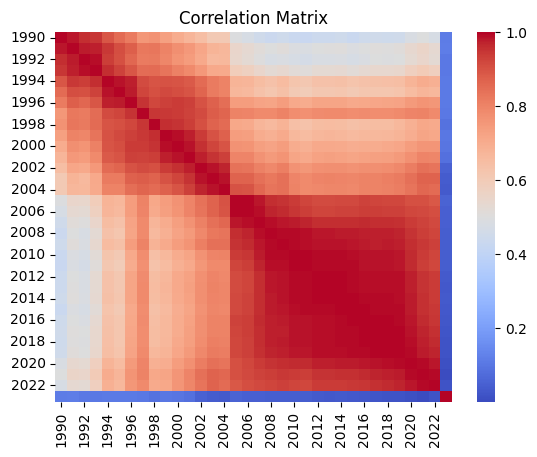

In [ ]:
# Calculate the correlation matrix
corr_matrix = inflow.corr().abs()
# Create a heatmap 
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

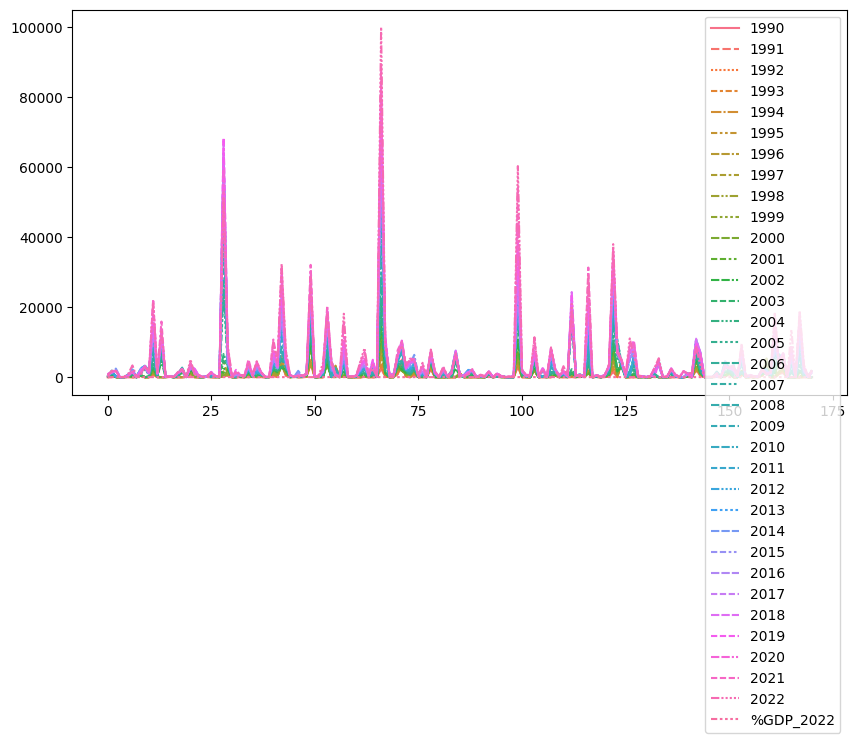

In [ ]:
# create the line plot 
fig = plt.gcf()
fig.set_size_inches(10, 5)
sns.lineplot(data=inflow)
plt.show()

In [ ]:
# Snippet of outflow dataset
outflow.head()

,Outward remittance flows (US$ million),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,%GDP_2021
0,Angola,150.000000,124.500000,121.63700,132.900000,148.900000,209.5460,173.802000,179.950000,201.650000,...,2395.965856,2746.615873,1252.909012,1176.110314,961.415276,681.627015,549.082043,576.471437,445.400144,0.592453
1,Argentina,0.000000,0.000000,142.80000,163.100000,176.600000,195.2000,207.300000,231.700000,246.500000,...,887.803487,732.414557,685.001366,769.242058,1060.484530,1010.375536,694.899063,545.151525,588.559744,0.120928
2,Australia,601.367467,522.617129,457.80605,441.562934,487.695522,570.2000,728.177754,771.092538,796.700673,...,7253.781716,6953.239775,6037.610107,6179.374298,6793.253707,7267.729294,7439.097689,4358.562385,3804.212817,0.232637
3,"Bahamas, The",38.700000,49.500000,28.80000,27.300000,28.000000,31.7000,33.200000,36.800000,39.300000,...,138.725000,150.819241,178.800141,193.848518,262.328167,210.701450,206.900000,235.468494,246.134328,2.195863
4,Belize,7.150000,5.700000,6.00000,6.000000,6.568500,6.8815,6.875000,7.550000,6.900000,...,31.523218,33.269798,41.161361,45.202221,45.607620,42.979101,41.881052,42.407419,41.693205,1.718599


In [ ]:
# # Create a new column 'total_in_USD' containing the sum of values per row (axis=1)
#inflow.drop(columns=['%GDP_2022'],inplace=True)
inflow['total_in_USD'] = inflow.iloc[:,:-1].sum(axis=1)

#outflow.drop(columns=['%GDP_2021'],inplace=True)
outflow['total_in_USD'] = outflow.iloc[:,:-1].sum(axis=1)

In [ ]:
# Sort values by highest USD sum total (20)
top_inflow = inflow.sort_values(by='total_in_USD',ascending=False).head(20)
top_outflow = outflow.sort_values(by='total_in_USD',ascending=False).head(20)

In [ ]:
# Rename column and reset index
top_inflow.rename(columns={'Migrant remittance inflows (US$ million)':'Country'}, inplace=True)
top_inflow.reset_index(drop=True, inplace=True)

top_outflow.rename(columns={'Outward remittance flows (US$ million)':'Country'}, inplace=True)
top_outflow.reset_index(drop=True, inplace=True)

<a id='Static-Graphs'></a>
## Visualizations: Top 20 countries with most inflows and outflows

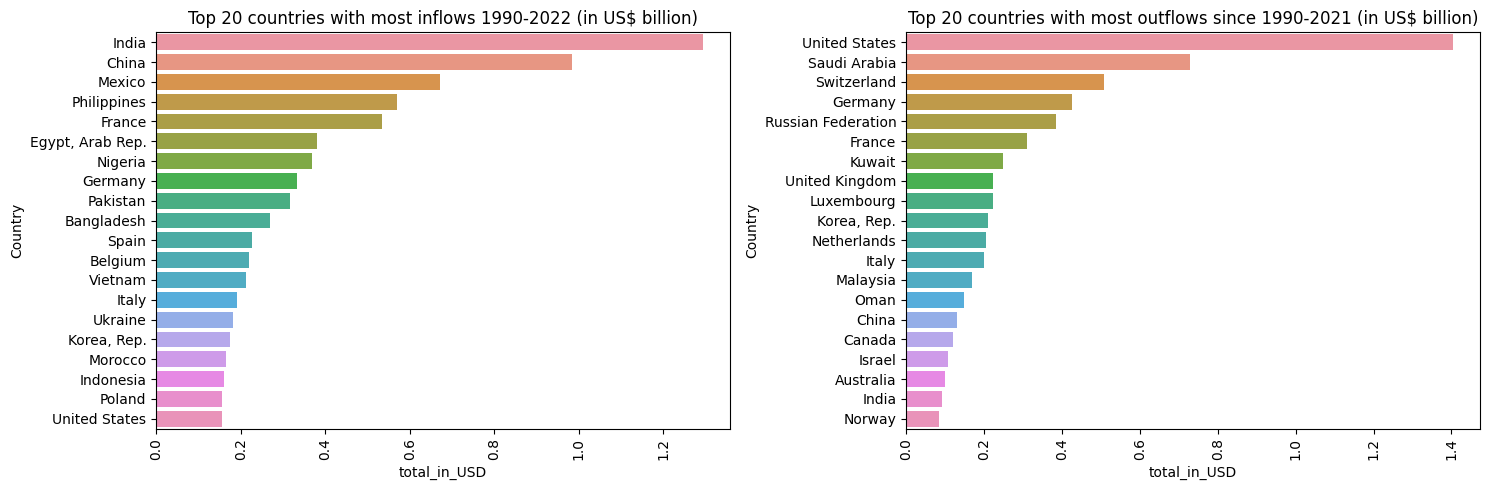

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the first bar chart on the left subplot
sns.barplot(x='total_in_USD', y='Country', data=top_inflow, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Top 20 countries with most inflows 1990-2022 (in US$ billion)')

# Plot the second bar chart on the right subplot
sns.barplot(x='total_in_USD', y='Country', data=top_outflow, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Top 20 countries with most outflows since 1990-2021 (in US$ billion)')

plt.tight_layout()

# Display the figure
plt.show()


To get more visuals, we combined the inflow dataset with country to continent dataset

In [ ]:
# Get the subregion for each country
df_c = pd.read_csv('/content/countryContinent.csv',delimiter=',', encoding = "ISO-8859-1")
df_c.head()

,Country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [ ]:
# Select `continent' and `sub_region` columns
df_c = df_c[['Country', 'sub_region']]
df_c.head()

,Country,sub_region
0,Afghanistan,Southern Asia
1,Åland Islands,Northern Europe
2,Albania,Southern Europe
3,Algeria,Northern Africa
4,American Samoa,Polynesia


In [ ]:
# Rename columns
inflow = inflow.rename(columns={'Migrant remittance inflows (US$ million)': 'Country'})
outflow = outflow.rename(columns={'Outward remittance flows (US$ million)': 'Country'})

In [ ]:
# Merge the two dataframes
inflow_df = pd.merge(inflow, df_c, on='Country')
outflow_df = pd.merge(outflow,df_c, on='Country')
inflow_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2016,2017,2018,2019,2020,2021,2022,%GDP_2022,total_in_USD,sub_region
0,Afghanistan,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,627.710802,822.731630,803.546454,828.571904,788.917115,300.000000,350.000000,2.058824,6477.570209,Southern Asia
1,Albania,0.00000,0.000000,151.8,332.000000,307.100000,427.3,550.900000,300.300000,504.140000,...,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1718.320554,1800.000000,9.859772,33846.626379,Southern Europe
2,Algeria,352.44176,232.990263,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1829.459057,0.977510,19411.065029,Northern Africa
3,Angola,0.00000,0.000000,0.0,0.000000,0.000000,0.0,5.142000,0.000000,0.000000,...,3.988048,1.418196,1.579247,3.445473,8.053051,12.631149,16.420494,0.013158,272.210543,Middle Africa
4,Antigua and Barbuda,9.40000,0.000000,0.0,7.925926,8.614815,0.0,8.940741,9.537037,18.755556,...,26.705676,24.020044,32.768265,36.955426,36.331448,50.142028,34.590023,2.044328,659.036966,Caribbean


In [ ]:
# Group the countries by sub-region
grouped_inflow = inflow_df.groupby('sub_region')['total_in_USD'].sum().sort_values(ascending=False)
grouped_outflow = outflow_df.groupby('sub_region')['total_in_USD'].sum().sort_values(ascending=False)

### Visualization for Total Remittance inflows and outflows by sub-regions

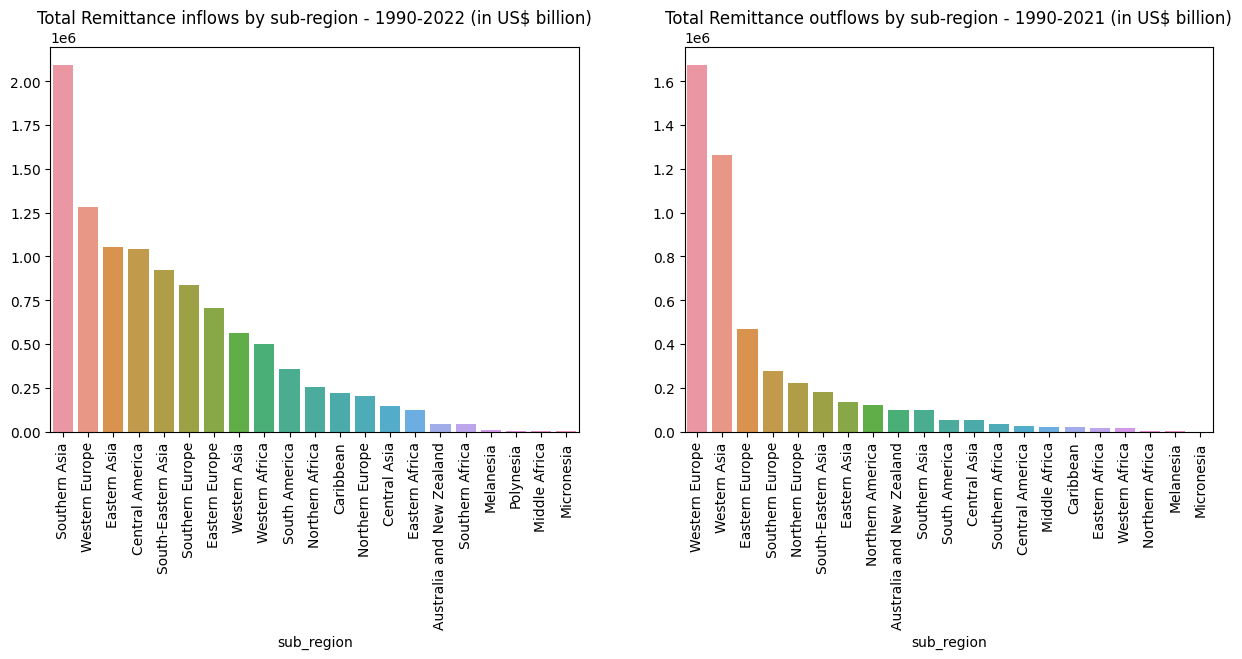

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the first bar chart on the left subplot
sns.barplot(x=grouped_inflow.index, y=grouped_inflow.values, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Total Remittance inflows by sub-region - 1990-2022 (in US$ billion)')

# Plot the second bar chart on the right subplot
sns.barplot(x=grouped_outflow.index, y=grouped_outflow.values, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Total Remittance outflows by sub-region - 1990-2021 (in US$ billion)')

# Display the figure
plt.show()

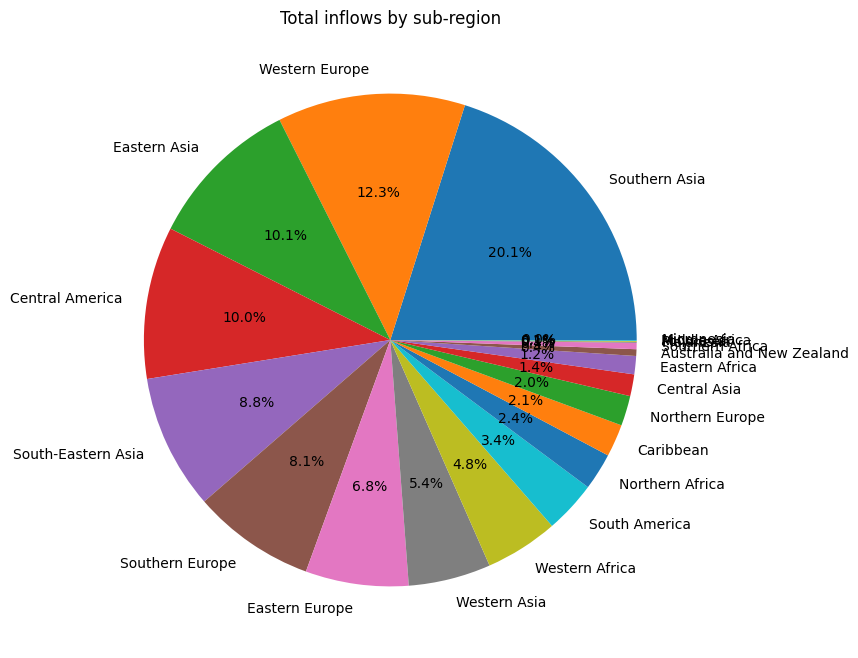

In [ ]:
# Create a pie chart of the total inflows by sub-region
plt.figure(figsize=(8,8))
plt.pie(grouped_inflow.values, labels=grouped_inflow.index, autopct='%1.1f%%')
plt.title('Total inflows by sub-region')
plt.show()

In [ ]:
# Drop column 'total_in_USD'
inflow_df = inflow_df.drop('total_in_USD', axis=1)

# Transpose the dataframe
inflow_df_t = inflow_df.T

In [ ]:

# Get time values per country
inflow_df_t.columns = inflow_df_t.iloc[0]
inflow_df_t = inflow_df_t.drop(['Country', 'sub_region'])

# Get country name per sub region
country = []
sub_region = []

cont_region = pd.DataFrame()
for i in inflow_df['sub_region'].unique():
    country.append(inflow_df[inflow_df['sub_region'] == i]['Country'])
    sub_region.append(i)

In [ ]:
sub_region

['Southern Asia',
 'Southern Europe',
 'Northern Africa',
 'Middle Africa',
 'Caribbean',
 'South America',
 'Western Asia',
 'Australia and New Zealand',
 'Western Europe',
 'Eastern Europe',
 'Central America',
 'Western Africa',
 'Southern Africa',
 'Eastern Africa',
 'South-Eastern Asia',
 'Eastern Asia',
 'Northern Europe',
 'Melanesia',
 'Central Asia',
 'Micronesia',
 'Polynesia']

In [ ]:
# Create a directory to store the figures
if not os.path.exists('figures'):
    os.makedirs('figures')

#plot Remittance inflows for every country per sub-region
for i in range(len(sub_region)):
    fig = px.line(inflow_df_t[country[i]],
                  title = sub_region[i], 
                  labels={
                      'index': '', 'value': ''})
    fig.show()

### Top 10 countries with the highest remittance inflows in 2022 and as a percentage of GDP in 2022

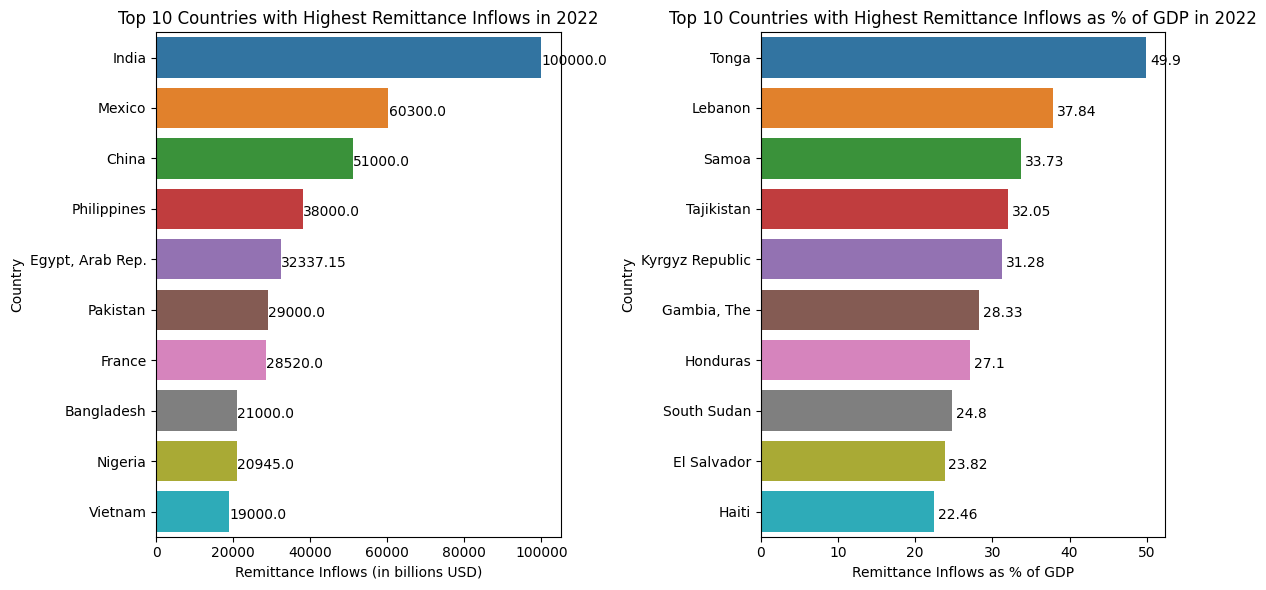

In [ ]:
# Select the top 10 countries with the highest remittance inflows in 2022 and as a percentage of GDP in 2022
top_10a = inflow.nlargest(10, '2022')
top_10b = inflow.nlargest(10, '%GDP_2022')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a horizontal bar chart of the top 10 countries by remittance inflows using Seaborn
sns.barplot(data=top_10a, x='2022', y='Country', ax=axes[0])
sns.barplot(data=top_10b, x='%GDP_2022', y='Country', ax=axes[1])

# Set the chart titles and axis labels
axes[0].set_title('Top 10 Countries with Highest Remittance Inflows in 2022')
axes[0].set_xlabel('Remittance Inflows (in billions USD)')
axes[0].set_ylabel('Country')

axes[1].set_title('Top 10 Countries with Highest Remittance Inflows as % of GDP in 2022')
axes[1].set_xlabel('Remittance Inflows as % of GDP')
axes[1].set_ylabel('Country')

# Add annotations to the horizontal bar charts
for i, v in enumerate(top_10a['2022']):
    axes[0].text(v + 1, i + .15, str(round(v,2)), color='black')
    
for i, v in enumerate(top_10b['%GDP_2022']):
    axes[1].text(v + 0.5, i + .15, str(round(v,2)), color='black')
# Adjust the layout to avoid overlapping of labels
plt.tight_layout()

# Display the chart
plt.show()

#### Plot graph of `2022` and `%GDP_2022` according to sub-region

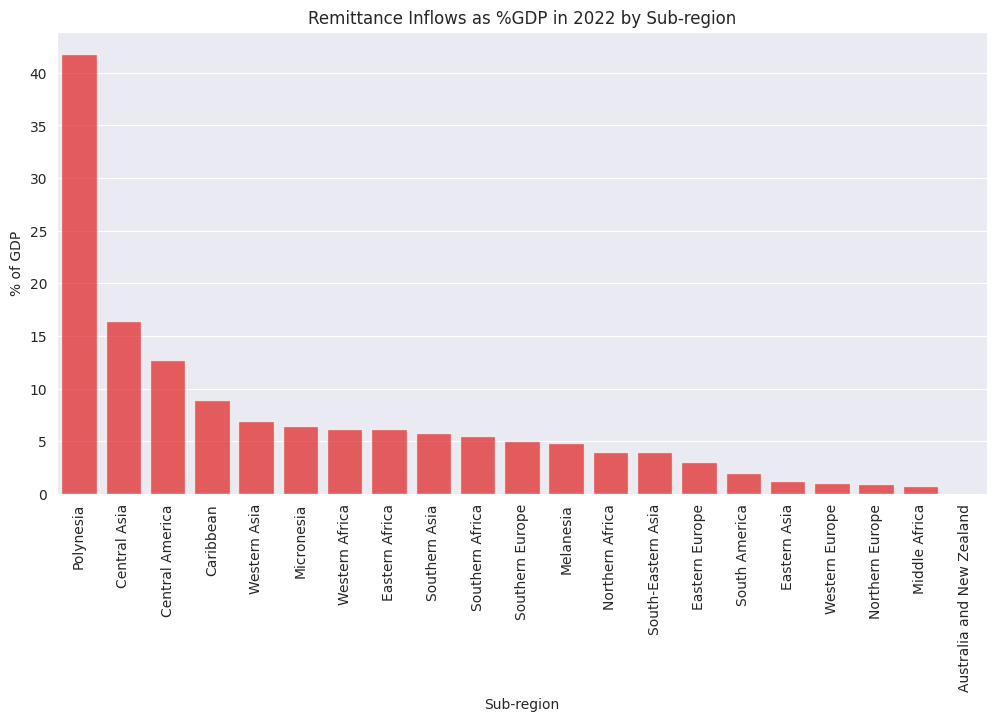

In [ ]:
# Group the data by sub_region and calculate the mean for each column
grouped_data = inflow_df.groupby('sub_region')['%GDP_2022'].mean().sort_values(ascending=False)

# Create a barplot of '%GDP_2022' by sub_region
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=grouped_data.index, y=grouped_data, color='r', alpha=0.7)
ax.set_ylabel('% of GDP')
ax.set_xlabel('Sub-region')
ax.set_title('Remittance Inflows as %GDP in 2022 by Sub-region')
ax.set_xticklabels(grouped_data.index, rotation=90)
plt.show()

#### Prepare datasets

In [ ]:
# Load the inward remittance flows dataset
df = pd.read_csv('/content/remittance_inflows.csv', index_col = 0)

print(df.shape)
# Display the first few rows of the dataset
df.head()

(171, 34)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,%GDP_2022
Migrant remittance inflows (US$ million),,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,300.000000,350.000000,2.058824
Albania,0.00000,0.000000,151.8,332.000000,307.100000,427.3,550.900000,300.300000,504.140000,407.200000,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1718.320554,1800.000000,9.859772
Algeria,352.44176,232.990263,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1829.459057,0.977510
Angola,0.00000,0.000000,0.0,0.000000,0.000000,0.0,5.142000,0.000000,0.000000,0.000000,...,30.971119,11.114712,3.988048,1.418196,1.579247,3.445473,8.053051,12.631149,16.420494,0.013158
Antigua and Barbuda,9.40000,0.000000,0.0,7.925926,8.614815,0.0,8.940741,9.537037,18.755556,18.394444,...,32.100000,31.244412,26.705676,24.020044,32.768265,36.955426,36.331448,50.142028,34.590023,2.044328


In [ ]:
inflow = df.copy()

##Modelling

In [ ]:
# Split the data into input and target variables
X = inflow.drop(columns=['%GDP_2022'], axis=1) # Features
y = inflow['%GDP_2022'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Train shape:', X_train.shape) 
print('Test shape:', X_test.shape)

Train shape: (136, 33)
Test shape: (35, 33)


## Define functions for the models and train on the normalized data

### Linear Regression Model

In [ ]:
# Linear regression model
def linear_regression_model(X_trian, y_train, X_test, y_test):
    # Train a linear regression model on the normalized data
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Evaluate the model performance on the testing set
    y_pred = lr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
   
    return mae, mse, rmse

### Random Forest Model

In [ ]:
# Random Forest model
def random_forest_model(X_train, y_train, X_test, y_test):
    
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return mae, mse, rmse

### XGBoost Model

In [ ]:
def xgboost_model(X_train, y_train, X_test, y_test):
    # Train an XGBoost model on the normalized data
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
    xgb_model = xgb.train(params, dtrain, num_boost_round=100)

    # Evaluate the model performance on the testing set
    y_pred = xgb_model.predict(dtest)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

### Ridge Regression Model

In [ ]:
# Ridge regression
def ridge_regression(X_train, y_train, X_test, y_test):
    # Train a ridge regression model on the normalized data
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)

    # Evaluate the model performance on the testing set
    y_pred = ridge.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

### Lasso Regression Model

In [ ]:
# Lasso Regression
def lasso_regression(X_train, y_train, X_test, y_test):
    # Train a ridge regression model on the normalized data
    lasso = Lasso(alpha=1.0)
    lasso.fit(X_train, y_train)

    # Evaluate the model performance on the testing set
    y_pred = lasso.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

### SVR Model

In [ ]:
# SVR model function
def svr_model(X_train, y_train, X_test, y_test):
    # Train an SVR model on the normalized data
    svr = SVR(kernel='rbf', C=1.0, gamma='scale')
    svr.fit(X_train, y_train)

    # Evaluate the model performance on the testing set
    y_pred = svr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

### SGD model

In [ ]:
from sklearn.linear_model import SGDRegressor
def sgd_model(X_train, y_train, X_test, y_test):
    # Train an SVR model on the normalized data
    sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
    sgd_model.fit(X_train, y_train)

    # Evaluate the model performance on the testing set
    y_pred = sgd_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

## Evaluating the performance metrics of the models

In [ ]:
# Call the linear regression model function
lr_mae, lr_mse, lr_rmse = linear_regression_model(X_train, y_train, X_test, y_test)

# Call the random forest model function
rf_mae, rf_mse, rf_rmse = random_forest_model(X_train, y_train, X_test, y_test)

# Call the XGBoost model function
xgb_mae, xgb_mse, xgb_rmse = xgboost_model(X_train, y_train, X_test, y_test)

# Call the Ridge model function
ridge_mae, ridge_mse, ridge_rmse = ridge_regression(X_train, y_train, X_test, y_test)
                                             
# Call the Lasso model function
lasso_mae, lasso_mse, lasso_rmse = lasso_regression(X_train, y_train, X_test, y_test)

# Call the SVR model function
svr_mae, svr_mse, svr_rmse = svr_model(X_train, y_train, X_test, y_test)

# Call the SGD model function
sgd_mae, sgd_mse, sgd_rmse = sgd_model(X_train, y_train, X_test, y_test)

In [ ]:
# Create a dictionary with the evaluation metrics for each model
metrics = {
    'Linear Regression': [lr_mae, lr_mse, lr_rmse],
    'Random Forest': [rf_mae, rf_mse, rf_rmse],
    'XGBoost': [xgb_mae, xgb_mse, xgb_rmse],
    'Ridge': [ridge_mae, ridge_mse, ridge_rmse],
    'Lasso': [lasso_mae, lasso_mse, lasso_rmse],
    'SVR': [svr_mae, svr_mse, svr_rmse],
    'SGD': [sgd_mae, sgd_mse, sgd_rmse]
}

# Create a pandas dataframe from the dictionary
df_metrics = pd.DataFrame.from_dict(metrics, orient='index', columns=['MAE', 'MSE', 'RMSE'])

# Print the dataframe
df_metrics

,MAE,MSE,RMSE
Linear Regression,5.892203,61.148973,7.819781
Random Forest,4.818888,48.982562,6.998754
XGBoost,5.306699,60.191991,7.758350
Ridge,5.253557,45.058726,6.712580
Lasso,5.507718,47.603492,6.899528
SVR,3.817812,51.180846,7.154079
SGD,5.333529,45.056355,6.712403


Based on the output, the **Random Forest** model has the lowest MAE, MSE, and RMSE values, indicating that it has the best performance among the models listed. The SVR model also has relatively low values for all three metrics, indicating good performance as well. 

In [ ]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Initialize and fit the model on normalized data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
# Transform the testing set back to its original scale
X_test_original = scaler.inverse_transform(X_test)

# Use the model to make predictions on the testing set in its original scale
prediction = rf_model.predict(X_test_original)

# Evaluate the model's performance
score = rf_model.score(X_test_original, y_test)
print('Model accuracy:', score)

Model accuracy: 0.17826080305171488


## Hyperparameter Tuning using GridSearchCV

In [ ]:
# define the random forest model
rf = RandomForestRegressor()

# define the hyperparameters and their possible values
param_grid = {'n_estimators': [50, 100, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [None, 5, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [ ]:
# define the grid search cross-validation object
rf_grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search object to the data
rf_grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", rf_grid_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# use the best hyperparameters to train the model
rf_best = RandomForestRegressor(**rf_grid_search.best_params_)
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=4,
                      n_estimators=50)

In [ ]:
# define the SVR model
svr = SVR()

# define the hyperparameters and their possible values
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto']}

In [ ]:
# define the grid search cross-validation object
svr_grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)

# fit the grid search object to the data
svr_grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", svr_grid_search.best_params_)

Best hyperparameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# use the best hyperparameters to train the model
svr_best = SVR(**svr_grid_search.best_params_)
svr_best.fit(X_train, y_train)

SVR(C=10, gamma='auto')

In [ ]:
# Print the best hyperparameters and score for each model
print('Random Forest:')
print('Best Score:', rf_grid_search.best_score_)
print('==='* 10)

print('SVR:')
print('Best Score:', svr_grid_search.best_score_)
print('==='* 10)

Random Forest:
Best Score: -0.016046631656042632
SVR:
Best Score: -0.11852809320027387


The Random Forest model  best score was -0.016046631656042632. This means that the mean squared error of the Random Forest model on the validation data was around 0.016, which is quite low and indicates that the model has good predictive performance.

### Random Forest model prediction on the test set

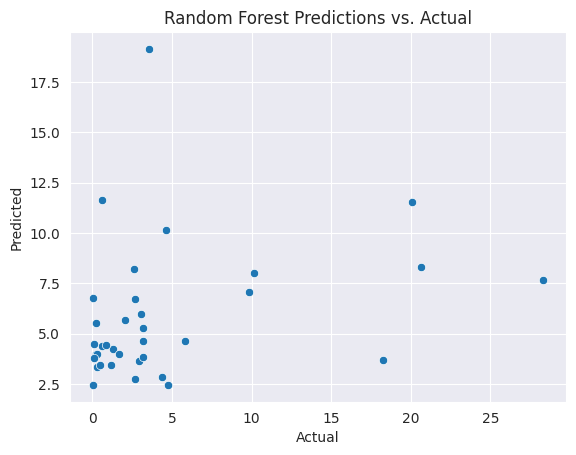

In [ ]:
# Get the predictions of the Random Forest model on the test set
rf_preds = rf_grid_search.predict(X_test)

# Plot the actual vs. predicted values using a scatter plot
sns.scatterplot(x=y_test, y=rf_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Predictions vs. Actual');

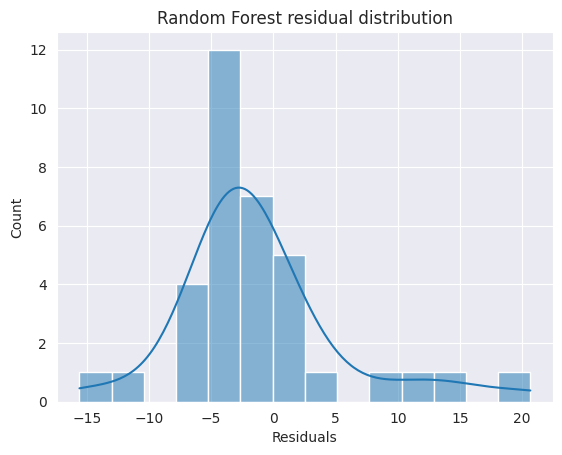

In [ ]:
# Compute the residuals
rf_resids = y_test - rf_preds

# Plot the distribution of residuals using a histogram
sns.histplot(rf_resids, kde=True)
plt.xlabel('Residuals')
plt.title('Random Forest residual distribution');

### SVR model

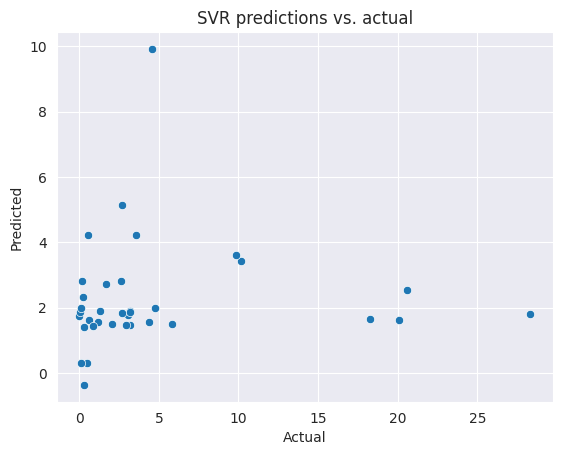

In [ ]:
# Predictions of SVR model on the tests set
svr_preds = svr_grid_search.predict(X_test)
sns.scatterplot(x=y_test, y=svr_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR predictions vs. actual');

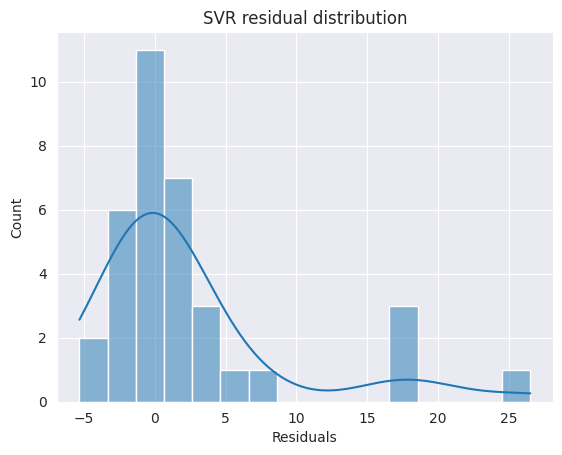

In [ ]:
# Compute the residuals for SVR model
svr_resids = y_test - svr_preds
# Plot the histogram of SVR residual distribution
sns.histplot(svr_resids, kde=True)
plt.xlabel('Residuals')
plt.title('SVR residual distribution')

plt.show();